In [1]:
%matplotlib widget

In [2]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

In [3]:
env = xt.Environment()
env.call('../fccee_z_lattice.py')

env['rf_on'] = 0

In [4]:
env.vars.load_json('strengths_quads_00_arc_cell.json')
env.vars.load_json('strengths_quads_01_ffccsyl.json')
env.vars.load_json('strengths_quads_02_ffccsxl.json')
env.vars.load_json('strengths_quads_03_ffccsyr.json')
env.vars.load_json('strengths_quads_04_ffccsxr.json')
env.vars.load_json('strengths_quads_05_ffds_lr.json')
env.vars.load_json('strengths_quads_06_straight.json')

env.vars.load_json('strengths_sext_00_arc_cell.json')
env.vars.load_json('strengths_sext_02_final_focus.json')

In [5]:
line = env['fccee_p_ring']
section = line.select('mid_cell_edge_r::0','mid_cell_edge_l::1')

In [6]:
# Twiss cells in the arc left and right to get boundary conditions
cell0 = line.select('mid_cell_edge_l::0','mid_cell_edge_r::0')
cell1 = line.select('mid_cell_edge_l::1','mid_cell_edge_r::1')

tw_cell_0 = cell0.twiss4d()
twinit_cell_0_r = tw_cell_0.get_twiss_init('mid_cell_edge_r')
tw_cell_1 = cell0.twiss4d()
twinit_cell_1_l = tw_cell_1.get_twiss_init('mid_cell_edge_l')

In [7]:
# Twiss
tw0 = section.twiss(init=twinit_cell_0_r,
                    compute_chromatic_properties=True,
                    strengths=True)

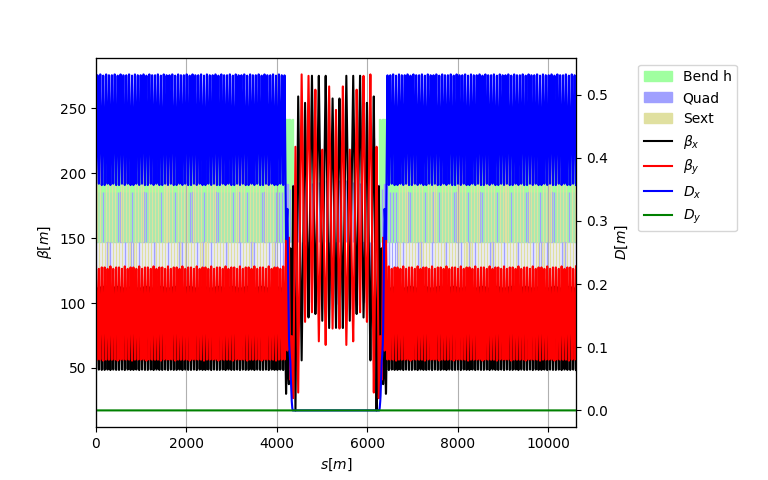

In [8]:
tw0.plot()

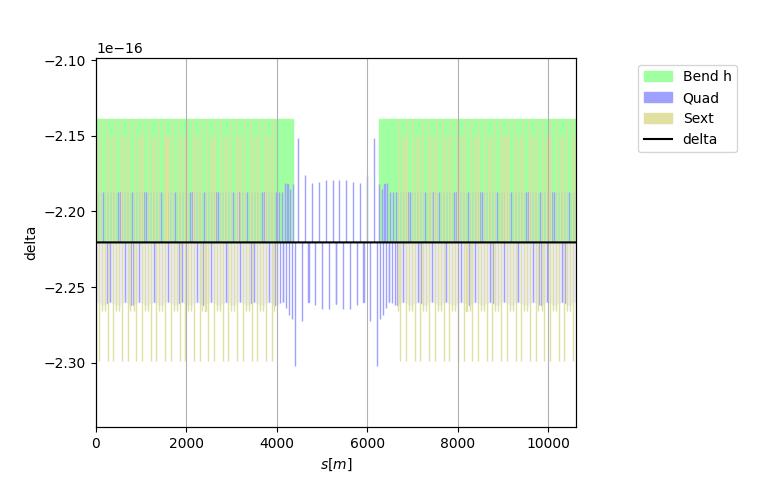

In [9]:
tw0.plot('delta')

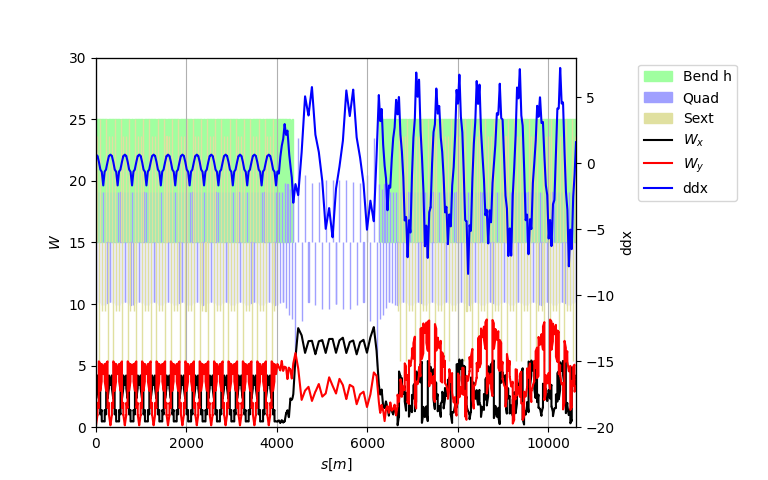

In [10]:
# W functions and second order dispersion before match
pp = tw0.plot(yl='wx_chrom wy_chrom', yr='ddx')
pp.ylim(left_lo=0, left_hi=30, right_lo=-20)

In [11]:
# Add matching knob to sextupoles close to the service straight
env.vars.default_to_zero = True
ss_sext_strengths = {}
ss_sext_strengths['ksd2ur'] = 'ksdfam2 + ksd2ur_delta'
ss_sext_strengths['ksf1ur'] = 'ksffam1 + ksf1ur_delta'
ss_sext_strengths['ksd1ur'] = 'ksdfam1 + ksd1ur_delta'
ss_sext_strengths['ksf2ur'] = 'ksffam2 + ksf2ur_delta'
ss_sext_strengths['ksf2sr'] = 'ksffam2 + ksf2sr_delta'
ss_sext_strengths['ksd1sr'] = 'ksdfam1 + ksd1sr_delta'
ss_sext_strengths['ksf1sr'] = 'ksffam1 + ksf1sr_delta'
ss_sext_strengths['ksf3sr'] = 0
ss_sext_strengths['ksf3sl'] = 0
ss_sext_strengths['ksf1sl'] = 'ksffam1 + ksf1sl_delta'
ss_sext_strengths['ksd1sl'] = 'ksdfam1 + ksd1sl_delta'
ss_sext_strengths['ksf2sl'] = 'ksffam2 + ksf2sl_delta'
ss_sext_strengths['ksf2ul'] = 'ksffam2 + ksf2ul_delta'
ss_sext_strengths['ksd1ul'] = 'ksdfam1 + ksd1ul_delta'
ss_sext_strengths['ksf1ul'] = 'ksffam1 + ksf1ul_delta'
ss_sext_strengths['ksd2ul'] = 'ksdfam2 + ksd2ul_delta'
env.vars.update(ss_sext_strengths)
env.vars.default_to_zero = False

In [12]:
# Impose left-right simmetry
env['ksd2ur_delta'] = 'ksd2ul_delta'
env['ksf1ur_delta'] = 'ksf1ul_delta'
env['ksd1ur_delta'] = 'ksd1ul_delta'
env['ksf2ur_delta'] = 'ksf2ul_delta'
env['ksf2sr_delta'] = 'ksf2sl_delta'
env['ksd1sr_delta'] = 'ksd1sl_delta'
env['ksf1sr_delta'] = 'ksf1sl_delta'

In [13]:
opt = section.match(
    name='close',
    solve=False,
    init=twinit_cell_0_r,
    compute_chromatic_properties=True,
    vary=xt.VaryList(['ksf1sl_delta', 'ksd1sl_delta', 'ksf2sl_delta', 'ksf2ul_delta',
                      'ksd1ul_delta', 'ksf1ul_delta', 'ksd2ul_delta'], step=1e-4),
    targets=[
        xt.TargetSet(
                ax_chrom=twinit_cell_0_r.ax_chrom,
                ay_chrom=twinit_cell_0_r.ay_chrom,
                bx_chrom=twinit_cell_0_r.bx_chrom,
                by_chrom=twinit_cell_0_r.by_chrom,
                ddx=twinit_cell_0_r.ddx,
                ddpx=twinit_cell_0_r.ddpx,
                at=xt.END),
        xt.TargetSet(wx_chrom=xt.LessThan(3.), wy_chrom=xt.LessThan(4.),
                     at='serv_inser_mid'),
        xt.TargetSet(wx_chrom=xt.LessThan(4.), wy_chrom=xt.LessThan(8.),
                     at='sd1aur'),
        xt.TargetSet(wx_chrom=xt.LessThan(4.), wy_chrom=xt.LessThan(8.),
                     at='sd1asr'),
        xt.TargetSet(wx_chrom=xt.LessThan(4.), wy_chrom=xt.LessThan(8.),
                     at='sd1aul'),
        xt.TargetSet(wx_chrom=xt.LessThan(4.), wy_chrom=xt.LessThan(8.),
                     at='sd1asl'),
         ]
)     

In [14]:
opt.step(20)

                                             
Optimize [close] - start penalty: 3.31                         
Matching: model call n. 233 penalty = 9.4863e-06              
Optimize [close] - end penalty:  9.48628e-06                            


In [15]:
opt.target_status()

Target status:               enalty = 9.4863e-06              
id state tag                     tol_met       residue   current_val target_val              description                                 
0  ON    END_ax_chrom              False  -1.75942e-06  -1.48022e-06 2.7920744217026004e-07  ('ax_chrom', 'mid_cell_edge_l'), val=2.7 ...
1  ON    END_bx_chrom              False   6.49404e-06      -3.41487 -3.4148805621709695     ('bx_chrom', 'mid_cell_edge_l'), val=-3. ...
2  ON    END_ay_chrom              False  -3.88862e-08  -2.24466e-08 1.643964693730066e-08   ('ay_chrom', 'mid_cell_edge_l'), val=1.6 ...
3  ON    END_by_chrom              False  -2.19651e-08      0.148378 0.14837759875653228     ('by_chrom', 'mid_cell_edge_l'), val=0.1 ...
4  ON    END_ddx                   False  -4.77876e-08      0.638686 0.6386858423496176      ('ddx', 'mid_cell_edge_l'), val=0.638686 ...
5  ON    END_ddpx                  False  -3.15685e-08  -3.45149e-08 -2.9463399261713047e-09 ('ddpx', 'mid_ce

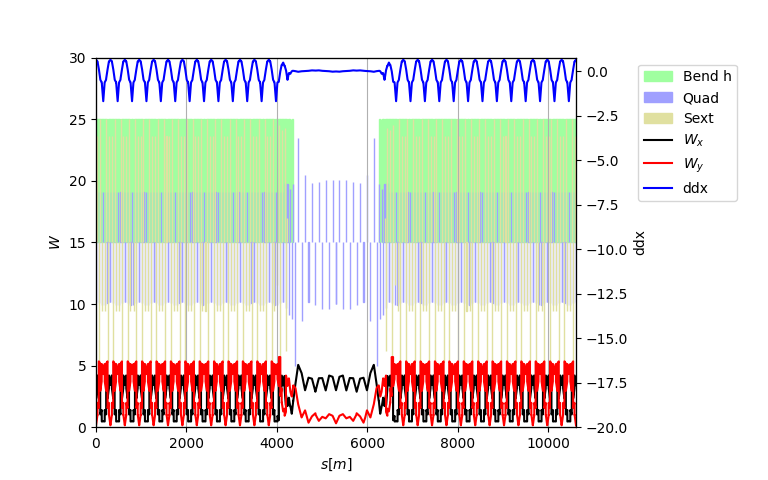

In [16]:
# W functions and second order dispersion after match
tw1 = section.twiss(init=twinit_cell_0_r,
                    compute_chromatic_properties=True,
                    strengths=True)
pp = tw1.plot(yl='wx_chrom wy_chrom', yr='ddx')
pp.ylim(left_lo=0, left_hi=30, right_lo=-20)

In [17]:
strengths = line.vars.get_table().rows[[
                 'ksf1sl_delta', 'ksd1sl_delta', 'ksf2sl_delta', 'ksf2ul_delta',
                 'ksd1ul_delta', 'ksf1ul_delta', 'ksd2ul_delta',
                 'ksf1sr_delta', 'ksd1sr_delta', 'ksf2sr_delta', 'ksf2ur_delta',
                 'ksd1ur_delta', 'ksf1ur_delta', 'ksd2ur_delta']]
strengths = strengths.to_dict()

In [18]:
xt.json.dump(ss_sext_strengths|strengths, 'strengths_sext_01_straight.json')

In [19]:
!cat strengths_sext_01_straight.json

{
 "ksd2ur": "ksdfam2 + ksd2ur_delta",
 "ksf1ur": "ksffam1 + ksf1ur_delta",
 "ksd1ur": "ksdfam1 + ksd1ur_delta",
 "ksf2ur": "ksffam2 + ksf2ur_delta",
 "ksf2sr": "ksffam2 + ksf2sr_delta",
 "ksd1sr": "ksdfam1 + ksd1sr_delta",
 "ksf1sr": "ksffam1 + ksf1sr_delta",
 "ksf3sr": 0,
 "ksf3sl": 0,
 "ksf1sl": "ksffam1 + ksf1sl_delta",
 "ksd1sl": "ksdfam1 + ksd1sl_delta",
 "ksf2sl": "ksffam2 + ksf2sl_delta",
 "ksf2ul": "ksffam2 + ksf2ul_delta",
 "ksd1ul": "ksdfam1 + ksd1ul_delta",
 "ksf1ul": "ksffam1 + ksf1ul_delta",
 "ksd2ul": "ksdfam2 + ksd2ul_delta",
 "ksf1sl_delta": -0.2254230978782413,
 "ksd1sl_delta": 0.021449310662590135,
 "ksf2sl_delta": 0.01816516400848335,
 "ksf2ul_delta": 0.01227546206806232,
 "ksd1ul_delta": 0.010688169224601803,
 "ksf1ul_delta": -0.013743122095798189,
 "ksd2ul_delta": 0.05755565259062247,
 "ksf1sr_delta": "ksf1sl_delta",
 "ksd1sr_delta": "ksd1sl_delta",
 "ksf2sr_delta": "ksf2sl_delta",
 "ksf2ur_delta": "ksf2ul_delta",
 "ksd1ur_delta": "ksd1ul_delta",
 "ksf1ur_delta": 